<a href="https://colab.research.google.com/github/GiharaNavindu/Ecom_CRud/blob/main/Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression model workshop**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Loading

In [ ]:
#import the necessary libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
#Load data as pandas dataframe

df = pd.read_csv("/content/drive/MyDrive/ML/insurance.csv")
print("Data is loaded")
df.head()

Data is loaded


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
#Print the shape of the dataframe
# Print the shape of the dataframe
print(df.shape)


(1338, 7)


In [21]:
#Print a concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data PreProcessing & EDA

In [24]:
#Seperate the independent and dependent variables

X= df.drop('charges',axis=1)
y=df.charges


#creates a new DataFrame X that contains all the columns from df except for the column named 'charges'.
#The axis=1 argument indicates that you want to drop a column (as opposed to axis=0, which would indicate dropping rows).

In [26]:
#Disply the first 5 datapoints

X.head()

#Target will not appear since it has been dropped with its column

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [27]:
#Display first  5 corresponding targets
y[:5]

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [29]:
#train test spiliting

from sklearn.model_selection import train_test_split
X_valTrain,X_test,y_valTrain,y_test =  train_test_split(X,y,test_size=0.25,random_state=42)

#This is a seed for the random number generator. Setting a fixed random_state ensures that the results are reproducible.
#Every time you run the code with the same random_state, you will get the same split of the data.
#this can be any value


In [33]:
#length of the training set
len(X_valTrain)


1003

In [32]:
len(X_test)

335

EDA

In [34]:
#Describe the characteristics of the numerical features in the training set
X_valTrain.describe()

,age,bmi,children
count,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686
std,14.039105,6.013107,1.204619
min,18.000000,15.960000,0.000000
25%,27.000000,26.210000,0.000000
50%,39.000000,30.200000,1.000000
75%,51.000000,34.430000,2.000000
max,64.000000,53.130000,5.000000


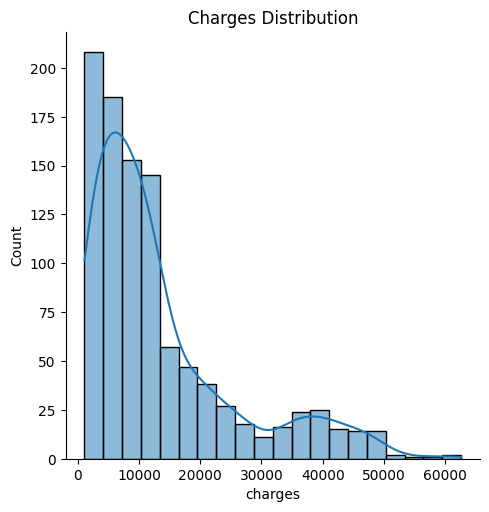

In [36]:
#Check the charges distribution

sb.displot(y_valTrain, kde=True, bins = 20).set(title="Charges Distribution")
#Kernel Density Estimate (KDE) is included.
#bins nmber in the histogram is 20


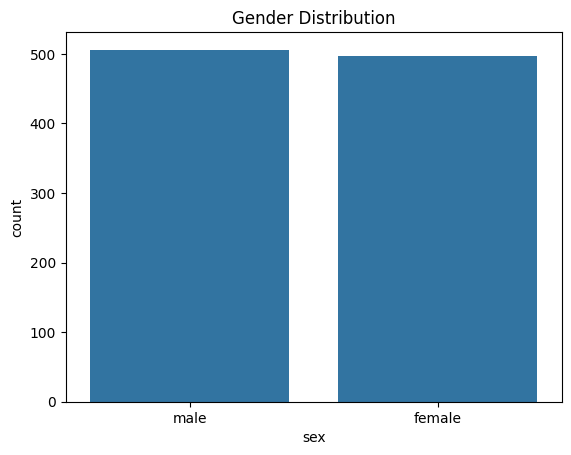

In [38]:
sb.countplot(x=X_valTrain.sex).set(title = 'Gender Distribution')
plt.show()
#creates a count plot
#x=X_valTrain.sex  specifies the data to be plotted on the x-axis.


In [44]:
# Check for the smoker distribution between genders

sb.catplot(x="smoker", kind="count", hue="sex", data = X_valTrain).set(title='Gender Smoke Distribution')


ValueError: Could not interpret value `smoke` for `x`. An entry with this name does not appear in `data`.

In [46]:
#Check for the charges distribution for somkers and non-amokers seperately
#But we have dropped the charges column before,therefore, we need to concate

# Combine features and target variable into a single DataFrame
df_temp_train = pd.concat([X_valTrain, y_valTrain], axis=1)

# Display the first few rows of the combined DataFrame
print(df_temp_train.head())

# Create a figure for plotting
fig = plt.figure(figsize=(12, 5))

      age     sex     bmi  children smoker     region      charges
693    24    male  23.655         0     no  northwest   2352.96845
1297   28  female  26.510         2     no  southeast   4340.44090
634    51    male  39.700         1     no  southwest   9391.34600
1022   47    male  36.080         1    yes  southeast  42211.13820
178    46  female  28.900         2     no  southwest   8823.27900


<Figure size 1200x500 with 0 Axes>